<a href="https://colab.research.google.com/github/Narusi/Python-Kurss/blob/master/Visualiz%C4%81cijas_praktiskais_uzdevumus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 6 kauliņi

Uztaisiet 100 000 garu sarakstu ar 6 metam kauliņu summu. (6 metienu summa vienā mērijumā) <br>
Saskaitiet šo summu biežumu (izmantojam <i>Counter</i>)<br>
Attēlojam stabiņu( vai kādā citā) diagrammā.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  """Entry point for launching an IPython kernel.


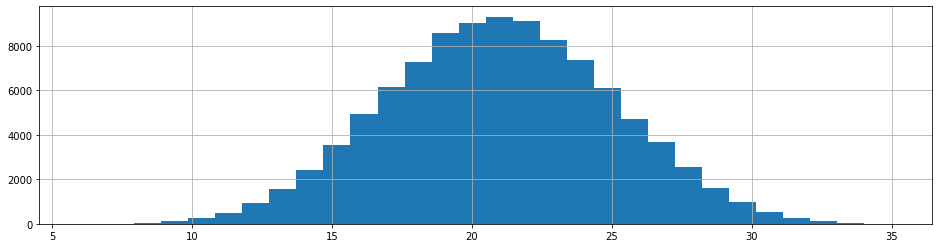

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


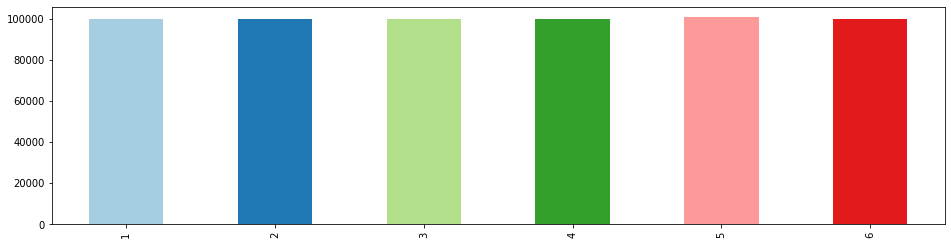

In [33]:
attempts = pd.DataFrame(np.random.random_integers(1,high=6, size=[100000,6]), 
                        columns=list(range(1,7)))
attemptSum = attempts.sum(axis=1)

attemptSum.hist(bins=30, figsize=(16,4))
plt.show()

throuwResultStats = pd.Series(index=attempts.columns)

for i in throuwResultStats.index:
    throuwResultStats[i] = attempts[attempts==i].count().sum()

throuwResultStats.plot(kind='bar', figsize=(16,4), 
                       color = plt.cm.Paired(np.arange(len(throuwResultStats))))
plt.show()

## 2. Datu izvilkšana un vizualizācija

Analizējiet atvērto datu kopu no data.gov.lv, tāda vienkāršāka kopa sākumam būtu:<br> https://data.gov.lv/dati/lv/dataset/pils-kompleksa-apmekletaji-valstis
<br>Pieejama arī: <br>
https://github.com/ValRCS/Python_RTU_08_20/blob/master/data/kopa_cesu_pils_apmekletaju_veidi_pa_gadiem_menesiem.csv
<br><br>Lasišanai varam izmantot standarta csv biblioteku vai pandas (kas nāk līdzi Anaconda)<br>
Skatamies dokumentāciju https://matplotlib.org/contents<br>
Piemēri šeit: https://matplotlib.org/tutorials/index.html<br>
Vēl piemēri šeit: https://pynative.com/python-matplotlib-exercise/<br>

1. Line Plot
2. Multi-Line Plot
3. Stabiņu Diagrammu
4. Pie-chart
5. Stack-Plot - aizpildītu laukuma diagrammu

### 2.b Pamēģinam to pašu ar Plotly biblioteku 

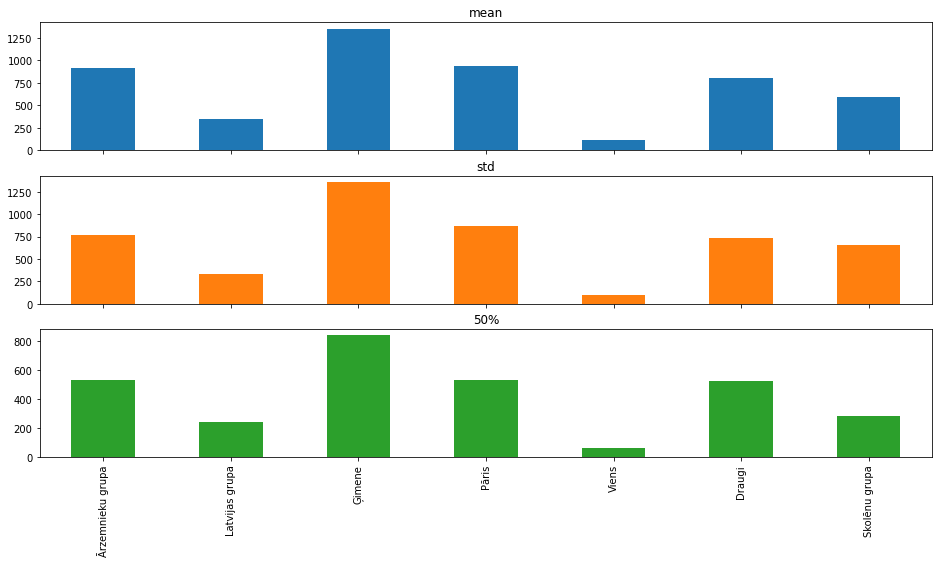

In [152]:
data = pd.read_csv('https://data.gov.lv/dati/dataset/633b5005-fe7f-44bd-b17c-4995d359f9b0/resource/975fb5a2-1be4-4183-b404-b32afe60c01a/download/kopa_cesu_pils_apmekletaju_veidi_pa_gadiem_menesiem.csv', sep=';')
data.drop('Gads', axis=1).describe().T[['mean','std','50%']].plot(kind='bar', subplots=True, 
                                                                  legend=False, figsize=(16,8))
plt.show()

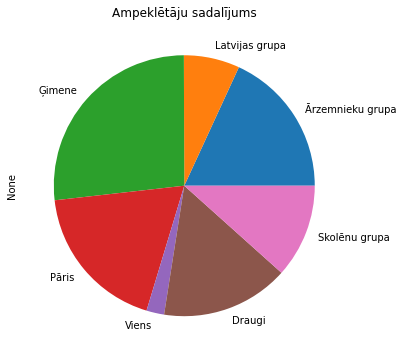

In [153]:
data.drop(['Gads','Mēnesis'], axis=1).mean(axis=0).plot(kind='pie', figsize=(6,6))
plt.title('Ampeklētāju sadalījums')
plt.show()

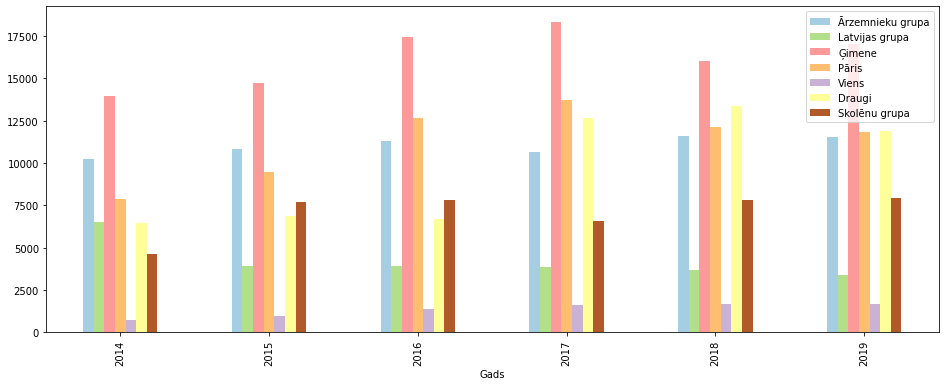

In [154]:
data.groupby('Gads')[['Ārzemnieku grupa','Latvijas grupa','Ģimene','Pāris',
                      'Viens','Draugi','Skolēnu grupa']].sum().plot(kind='bar', 
                                                                    figsize=(16,6),
                                                                    colormap='Paired')
plt.show();

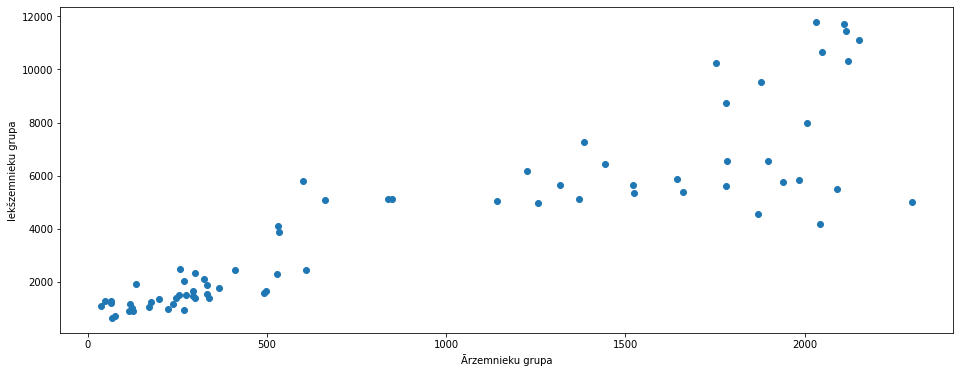

In [155]:
plt.figure(figsize=(16,6))
plt.scatter(x=data['Ārzemnieku grupa'], 
            y=data.drop(['Ārzemnieku grupa','Gads','Mēnesis'], axis=1).sum(axis=1))
plt.xlabel('Ārzemnieku grupa')
plt.ylabel('Iekšzemnieku grupa')
plt.show()

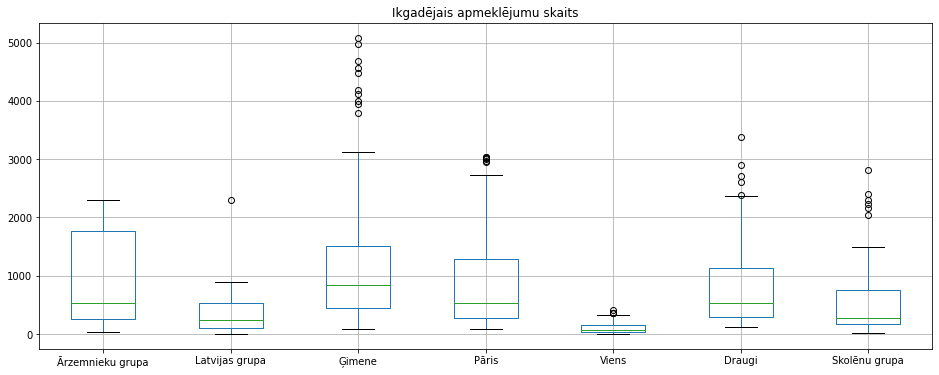

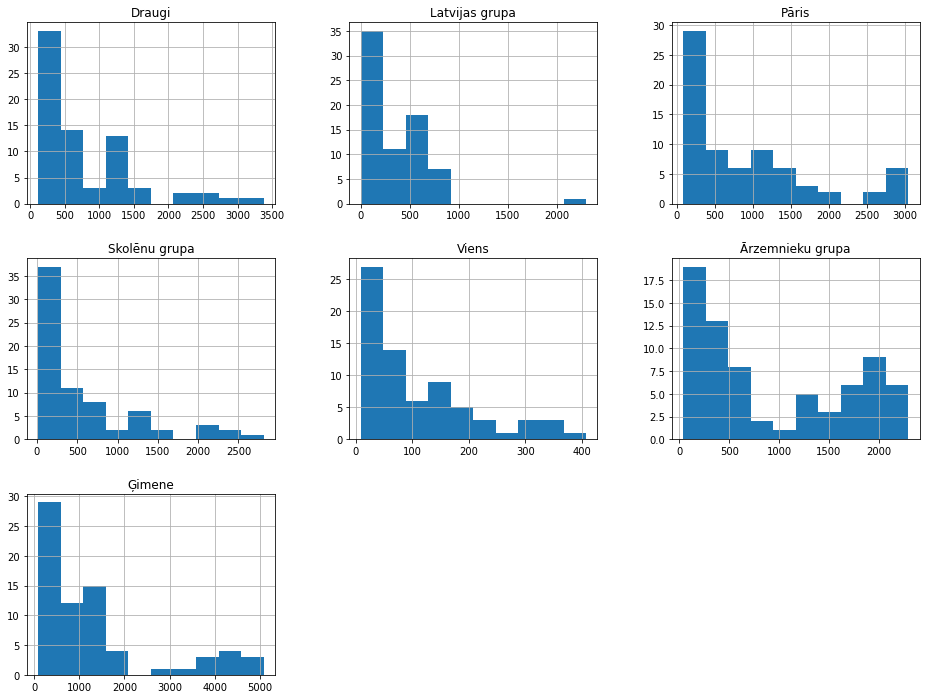

In [156]:
data.drop('Gads', axis=1).boxplot(figsize=(16,6))
plt.title('Ikgadējais apmeklējumu skaits')
plt.show();

data.drop('Gads', axis=1).hist(figsize=(16,12))
plt.show();

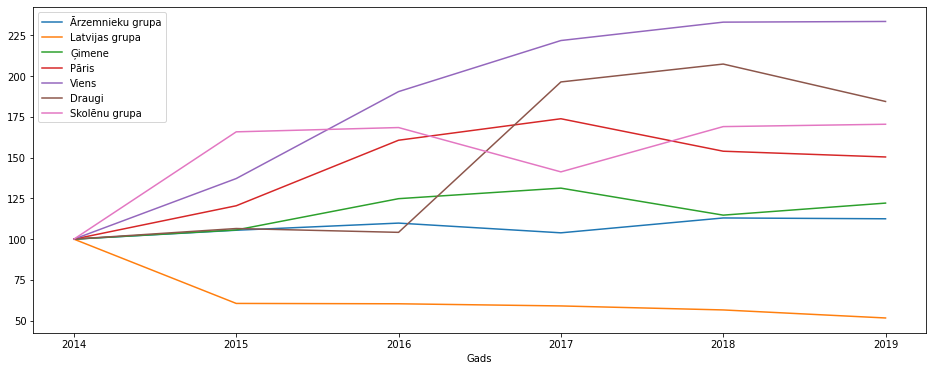

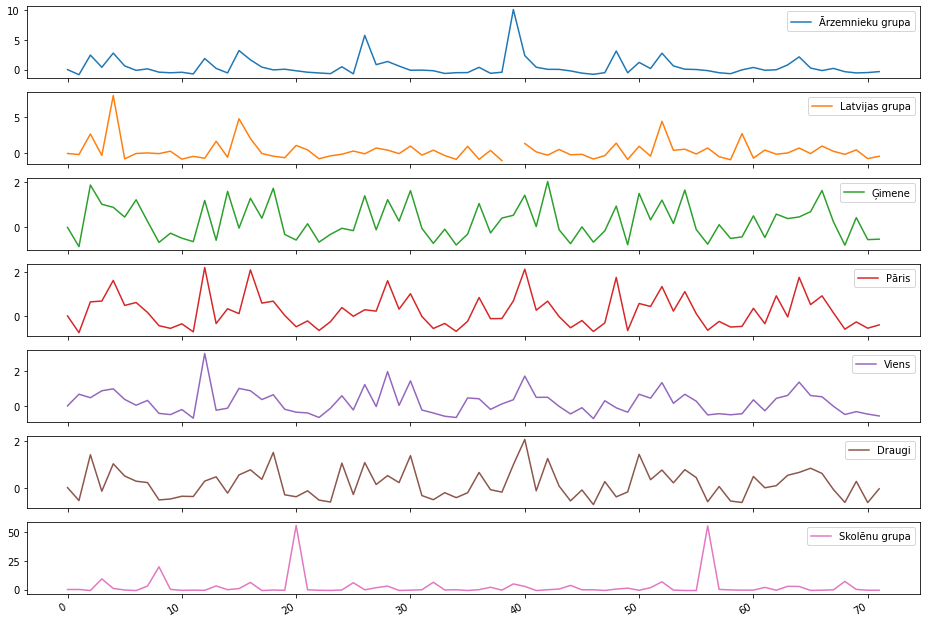

In [157]:
growthData = data.groupby('Gads').sum().pct_change().fillna(0)
growthData.add(1).cumprod().mul(100).plot(figsize=(16,6))
plt.show();

data[['Ārzemnieku grupa','Latvijas grupa','Ģimene','Pāris','Viens','Draugi',
      'Skolēnu grupa']].pct_change().fillna(0).plot(figsize=(16,12),
                                                    subplots=True)
plt.show();